In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import dataset 
df = pd.read_csv(r"C:\Users\cease\Documents\Datasets\End to End Projects\Car Price Prediction 2.csv")

df.head()

Unnamed: 0     name  year  selling_price  km_driven    fuel seller_type  \
0           0   Maruti  2014         450000     145500  Diesel  Individual   
1           2  Hyundai  2010         225000     127000  Diesel  Individual   
2           4  Hyundai  2017         440000      45000  Petrol  Individual   
3           7   Toyota  2011         350000      90000  Diesel  Individual   
4           8     Ford  2013         200000     169000  Diesel  Individual   

  transmission        owner  seats  max_power (in bph) Mileage Unit  Mileage  \
0       Manual  First Owner      5               74.00         kmpl    23.40   
1       Manual  First Owner      5               90.00         kmpl    23.00   
2       Manual  First Owner      5               81.86         kmpl    20.14   
3       Manual  First Owner      5               67.10         kmpl    23.59   
4       Manual  First Owner      5               68.10         kmpl    20.00   

   Engine (CC)  
0         1248  
1         1396  
2         1197  
3         1364  
4         1399

In [3]:
# Data Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [4]:
df.duplicated(keep=False).sum()

0

In [5]:
# Checking for null values 
df.isnull().sum()

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

# Exploratory Data Analysis 

In [6]:
# Drop columns 
df= df.drop(columns={'Unnamed: 0', 'Mileage Unit'})

In [7]:
# Rename columns 
df = df.rename(columns={'name':'Name', 'year':'Year', 'selling_price':'Price',
                         'km_driven':'Distance Driven (km)', 'fuel':'Fuel', 'seller_type':'Seller Type', 'transmission':'Transmission',
                         'owner':'Owner', 'seats':'Total Seats', 'max_power (in bph)':'Max power (bph)'})
df.head()

Name  Year   Price  Distance Driven (km)    Fuel Seller Type  \
0   Maruti  2014  450000                145500  Diesel  Individual   
1  Hyundai  2010  225000                127000  Diesel  Individual   
2  Hyundai  2017  440000                 45000  Petrol  Individual   
3   Toyota  2011  350000                 90000  Diesel  Individual   
4     Ford  2013  200000                169000  Diesel  Individual   

  Transmission        Owner  Total Seats  Max power (bph)  Mileage  \
0       Manual  First Owner            5            74.00    23.40   
1       Manual  First Owner            5            90.00    23.00   
2       Manual  First Owner            5            81.86    20.14   
3       Manual  First Owner            5            67.10    23.59   
4       Manual  First Owner            5            68.10    20.00   

   Engine (CC)  
0         1248  
1         1396  
2         1197  
3         1364  
4         1399

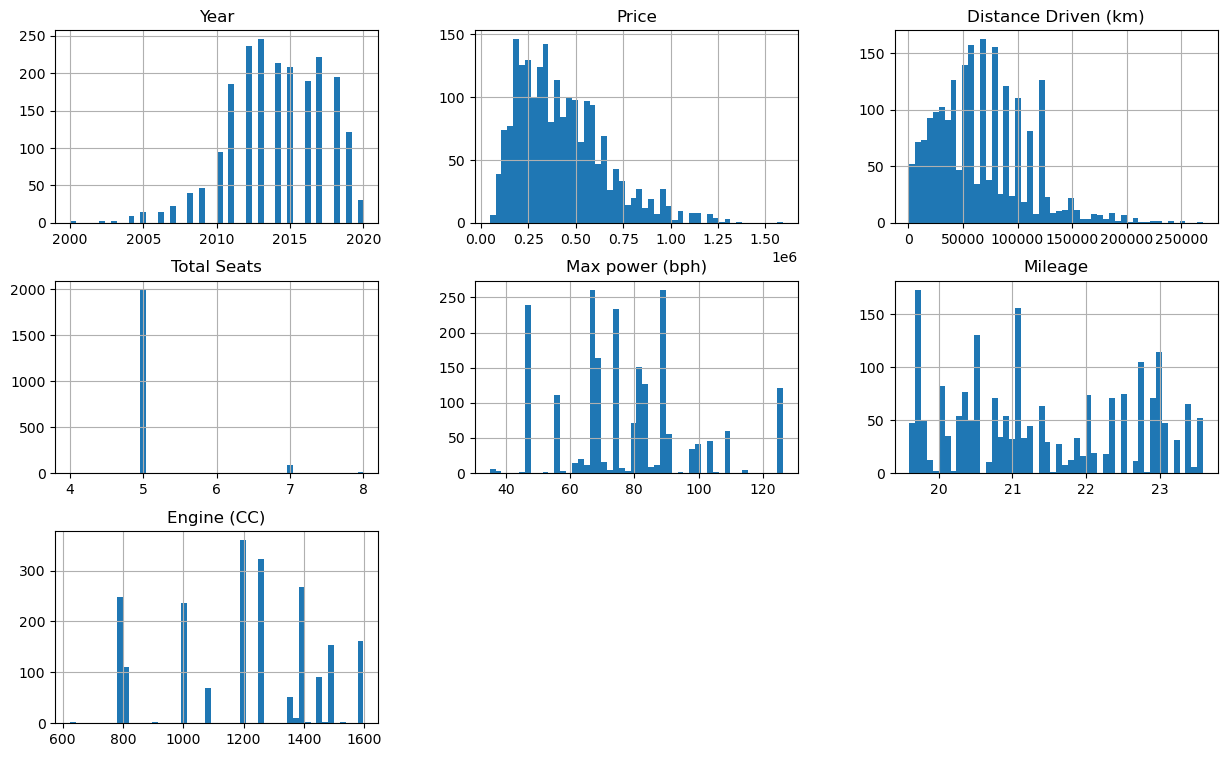

In [8]:
# Data distribution for numeric columns 
df.hist(bins=50, figsize=(15, 9))

plt.show()

In [9]:
df.describe()

Year         Price  Distance Driven (km)  Total Seats  \
count  2095.000000  2.095000e+03           2095.000000  2095.000000   
mean   2014.052506  4.272799e+05          67413.593795     5.096897   
std       3.273451  2.326698e+05          41580.846333     0.457000   
min    2000.000000  4.595700e+04           1000.000000     4.000000   
25%    2012.000000  2.500000e+05          35000.000000     5.000000   
50%    2014.000000  3.900000e+05          60000.000000     5.000000   
75%    2017.000000  5.555000e+05          90000.000000     5.000000   
max    2020.000000  1.594000e+06         270000.000000     8.000000   

       Max power (bph)      Mileage  Engine (CC)  
count      2095.000000  2095.000000  2095.000000  
mean         77.410427    21.397928  1205.078282  
std          19.884938     1.209234   245.058696  
min          35.000000    19.600000   624.000000  
25%          67.040000    20.360000   998.000000  
50%          74.000000    21.100000  1248.000000  
75%          88.730000    22.540000  1396.000000  
max         126.320000    23.590000  1598.000000

In [10]:
print(df.columns)

Index(['Name', 'Year', 'Price', 'Distance Driven (km)', 'Fuel', 'Seller Type',
       'Transmission', 'Owner', 'Total Seats', 'Max power (bph)', 'Mileage',
       'Engine (CC)'],
      dtype='object')


In [11]:
df['Name'].nunique()

10

In [12]:
# Most liked car model 
car_model = df['Name'].value_counts().reset_index(name='Count').iloc[:5]
car_model

Name  Count
0      Maruti    921
1     Hyundai    571
2        Ford    153
3        Tata    130
4  Volkswagen    111

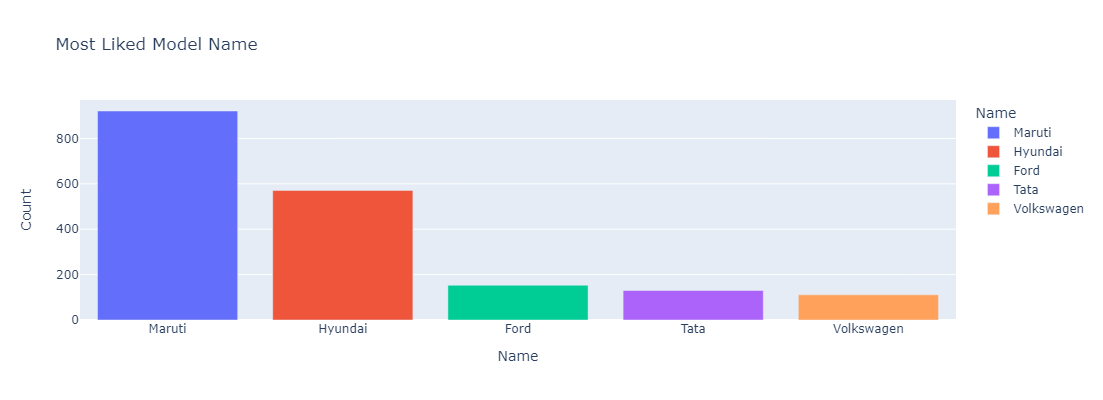

In [13]:
# Plot bar graphs 
fig = px.bar(car_model, x='Name', y='Count', color='Name',
             title='Most Liked Model Name',
             )

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=400,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
 
fig.show()


In [14]:
print(df.columns)

Index(['Name', 'Year', 'Price', 'Distance Driven (km)', 'Fuel', 'Seller Type',
       'Transmission', 'Owner', 'Total Seats', 'Max power (bph)', 'Mileage',
       'Engine (CC)'],
      dtype='object')


In [15]:
# Most liked car by transmission  
transmission = df['Transmission'].value_counts().reset_index(name='Count')
transmission

Transmission  Count
0       Manual   1996
1    Automatic     99

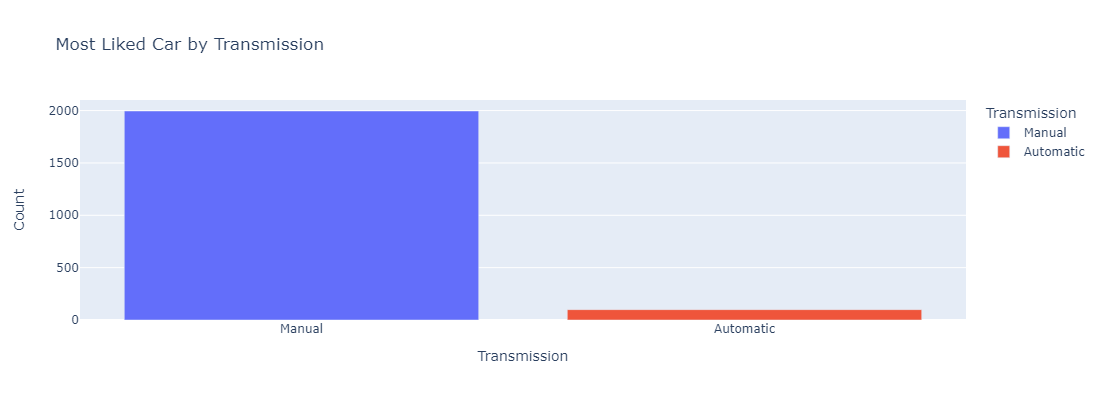

In [16]:
# Plot bar graphs 
fig = px.bar(transmission, x='Transmission', y='Count', color='Transmission',
             title='Most Liked Car by Transmission',
             )

# Update layout to vary length and width
fig.update_layout(
    width=1000,  
    height=400,  
    bargap=0.2,  
)
 
fig.show()


### Correlation Analysis 

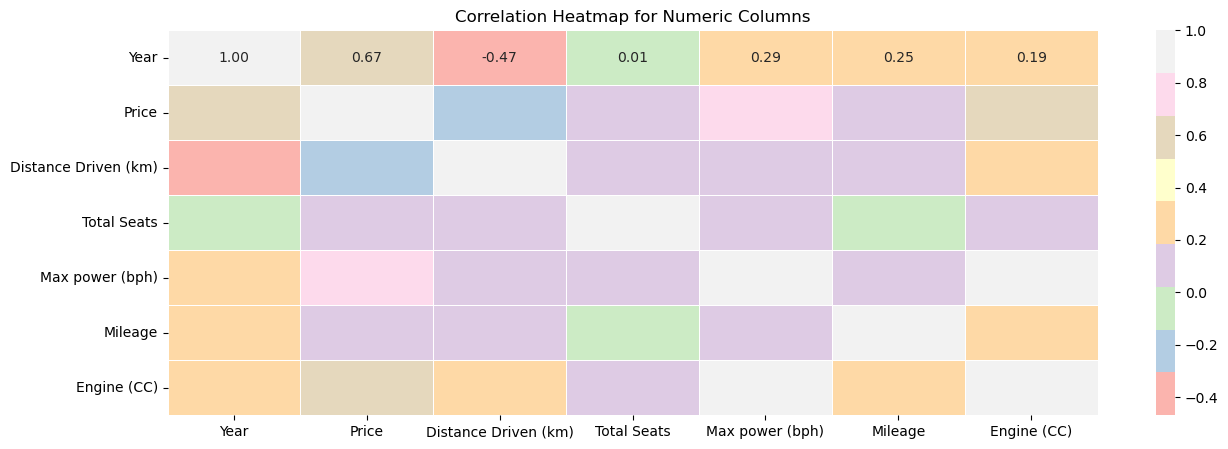

In [17]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Correlation analysis of the numeric attributes
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

### Pairplot

C:\Users\cease\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\cease\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\cease\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\cease\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\cease\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

<Figure size 1500x500 with 0 Axes>

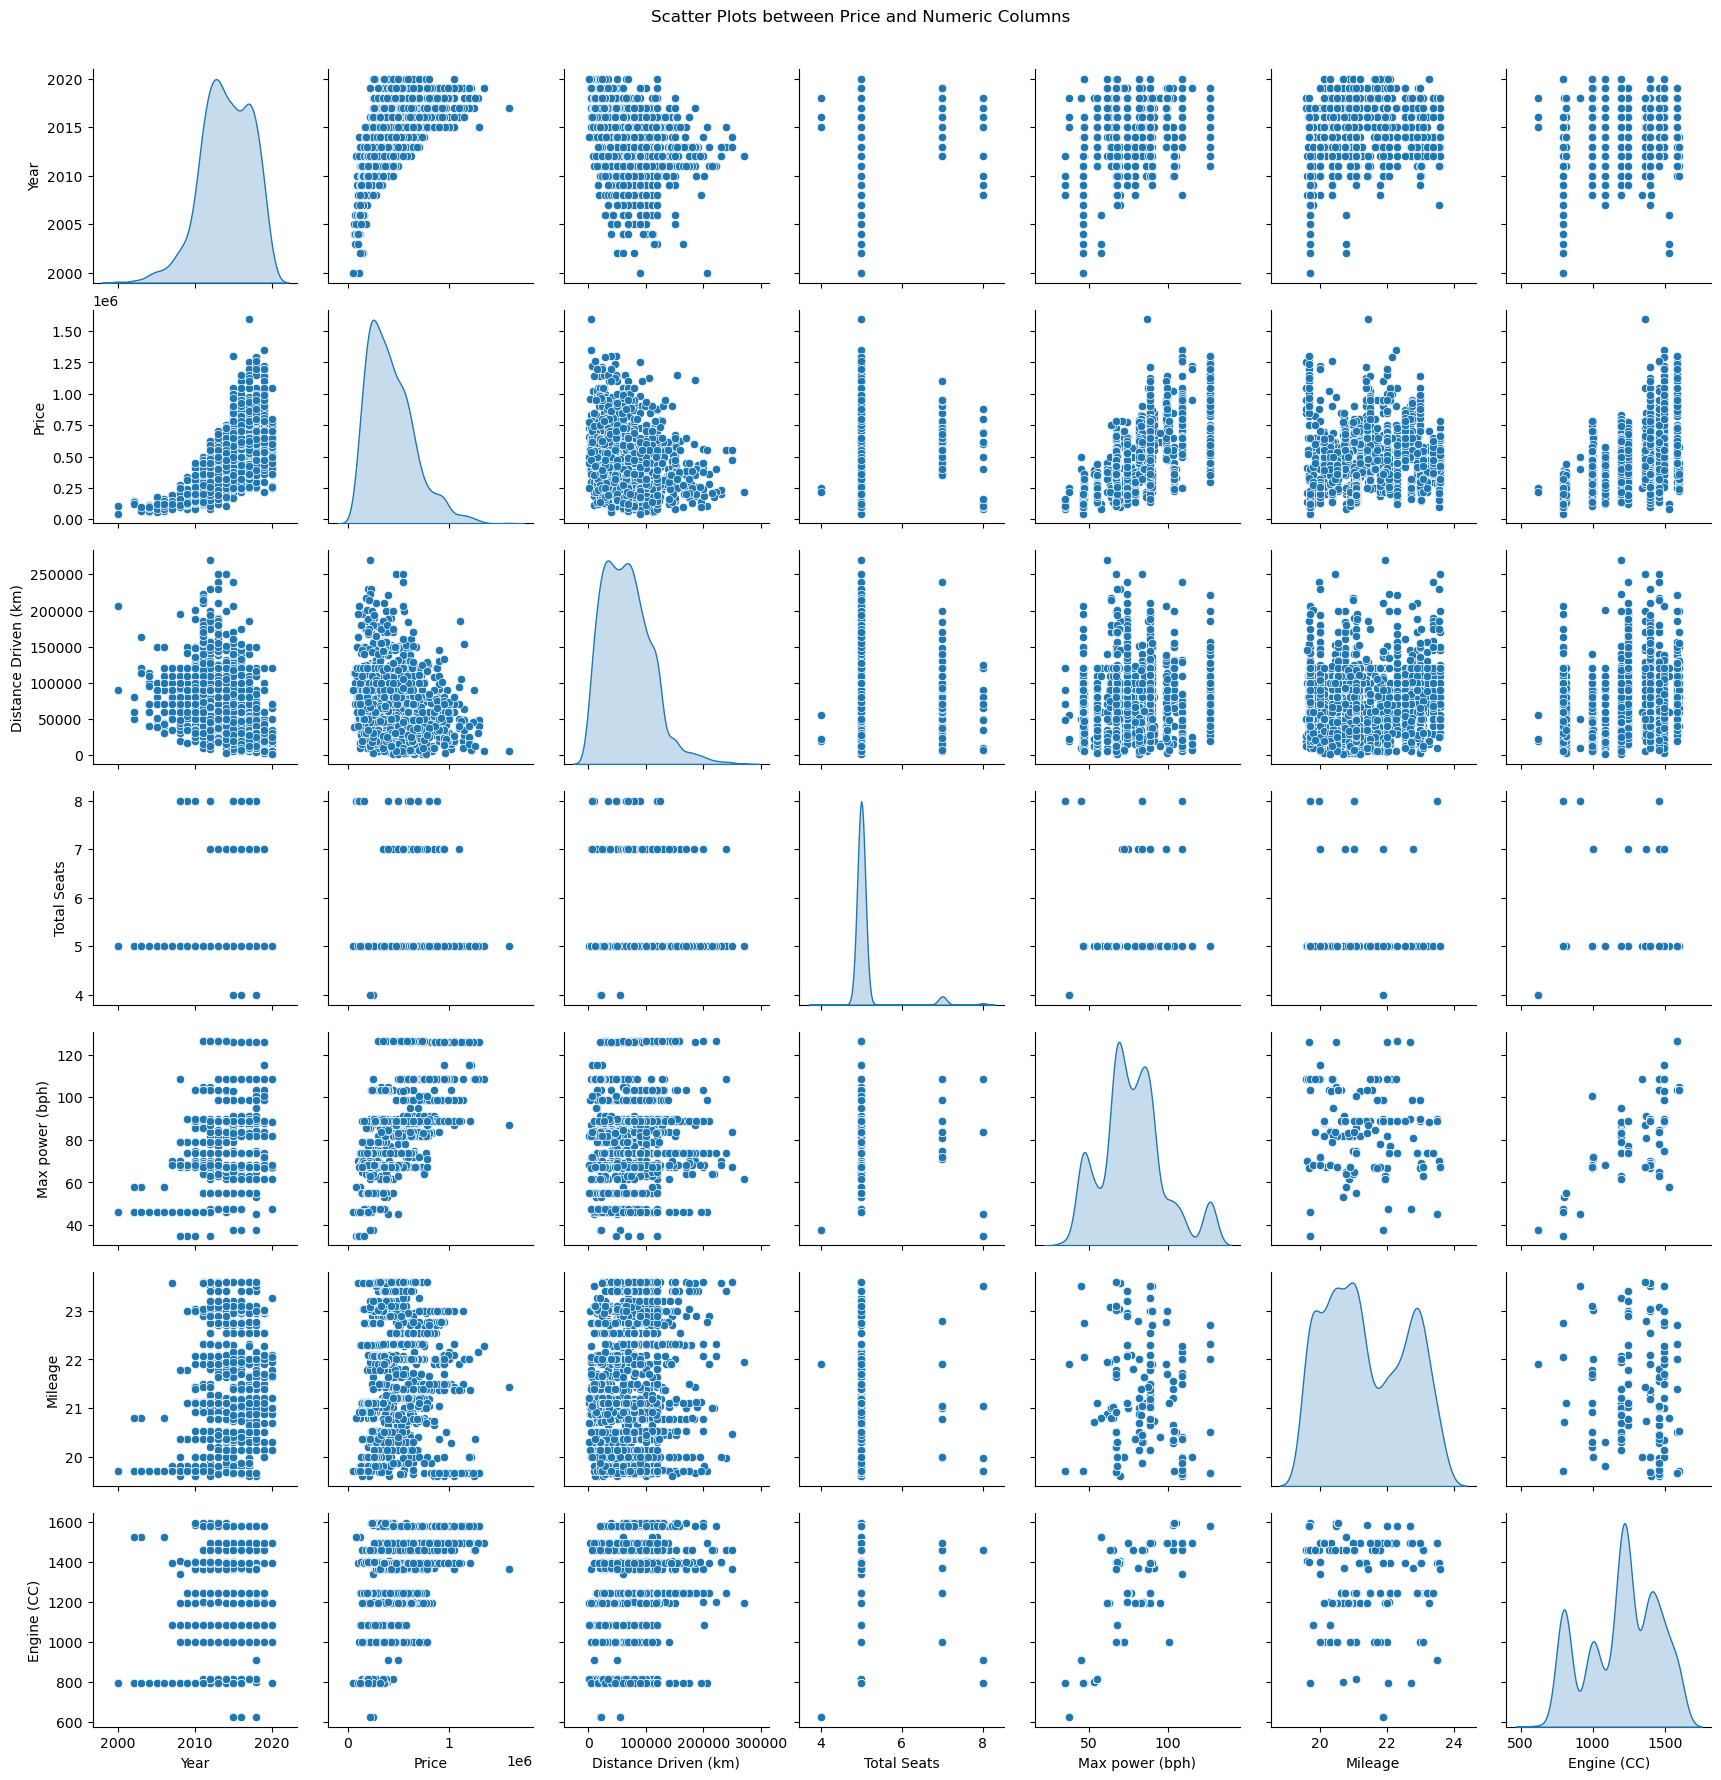

In [18]:
# Selecting numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Replace infinite values with NaN
numeric_columns.replace([np.inf, -np.inf], np.nan, inplace=True)

# Adding 'Price' column to the numeric columns
numeric_columns['Price'] = df['Price']

# Creating pairplot
plt.figure(figsize=(15, 5))
sns.pairplot(numeric_columns, kind='scatter', diag_kind='kde')
plt.suptitle('Scatter Plots between Price and Numeric Columns', y=1.02)
plt.show()


In [19]:
import pandas as pd
import numpy as np

def remove_outliers_iqr(df):

    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number])
    
    # Calculate the first quartile (Q1)
    Q1 = numeric_columns.quantile(0.25)

    # Calculate the third quartile (Q3)
    Q3 = numeric_columns.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows that fall outside the bounds
    df_no_outliers = df[~((numeric_columns < lower_bound) | (numeric_columns > upper_bound)).any(axis=1)]

    return df_no_outliers

# Example usage:
df = remove_outliers_iqr(df)



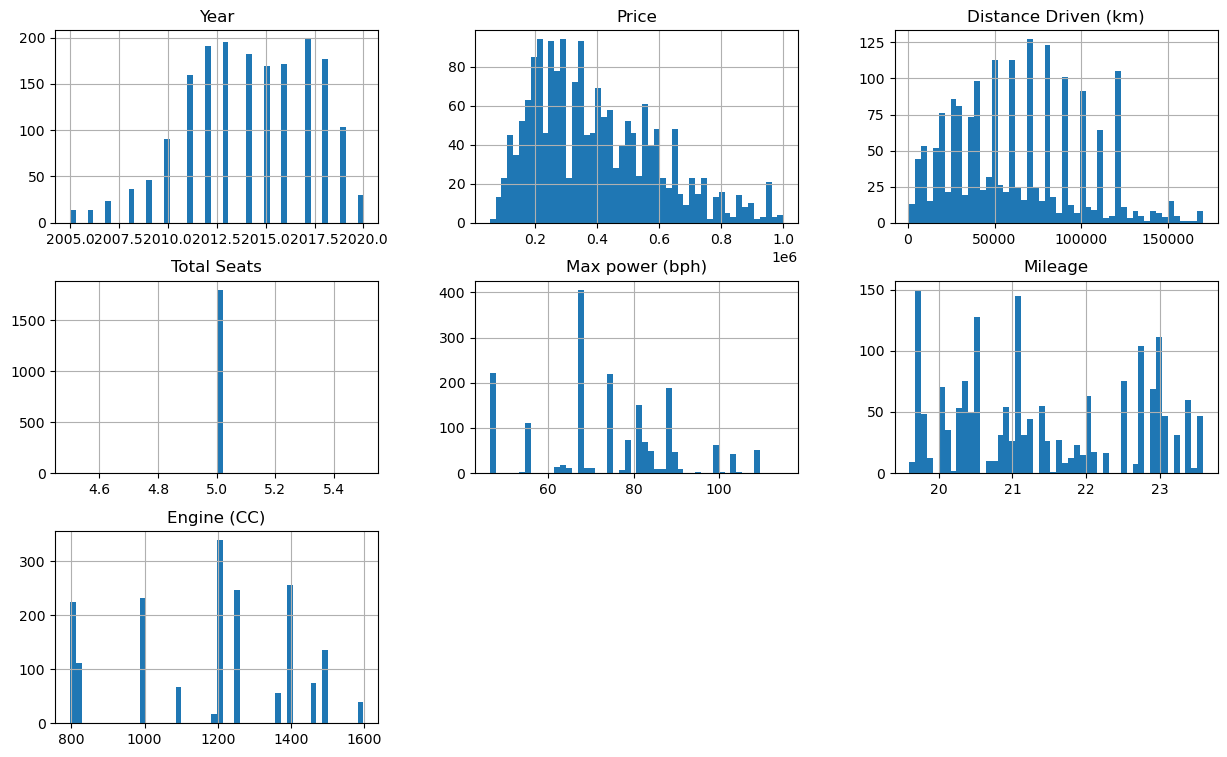

In [20]:
# Data distribution for numeric columns 
df.hist(bins=50, figsize=(15, 9))

plt.show()

### Data Preprocessing 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  1800 non-null   object 
 1   Year                  1800 non-null   int64  
 2   Price                 1800 non-null   int64  
 3   Distance Driven (km)  1800 non-null   int64  
 4   Fuel                  1800 non-null   object 
 5   Seller Type           1800 non-null   object 
 6   Transmission          1800 non-null   object 
 7   Owner                 1800 non-null   object 
 8   Total Seats           1800 non-null   int64  
 9   Max power (bph)       1800 non-null   float64
 10  Mileage               1800 non-null   float64
 11  Engine (CC)           1800 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 182.8+ KB


In [22]:
# Encoding 
from sklearn.preprocessing import LabelEncoder

# Creat a list of columns to encode 
columns = df.select_dtypes(include=['object'])

# Create a copy of the original dataframe df
data = df.copy()

# Initialize the label encoder 
label_encoders = {}

for col in columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

df = data.copy()

df.head()


Name  Year   Price  Distance Driven (km)  Fuel  Seller Type  Transmission  \
0     5  2014  450000                145500     1            1             1   
1     3  2010  225000                127000     1            1             1   
2     3  2017  440000                 45000     3            1             1   
3     8  2011  350000                 90000     1            1             1   
4     1  2013  200000                169000     1            1             1   

   Owner  Total Seats  Max power (bph)  Mileage  Engine (CC)  
0      0            5            74.00    23.40         1248  
1      0            5            90.00    23.00         1396  
2      0            5            81.86    20.14         1197  
3      0            5            67.10    23.59         1364  
4      0            5            68.10    20.00         1399

## Build the model 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
# Define the featuires and target variable 

# drop null values
df = df.dropna()

# Features 
X = df.drop(columns={'Price'})

# Target variable 
y = df['Price']

In [25]:
# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def model(X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor(n_estimators=30, random_state=42)

    # Fit the model on the entire training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    # Return the evaluation metrics
    return mae_test, r2_test, mape_test, mse_test, rmse_test

# Example usage:
# Assuming you have defined X_train_scaled, y_train, X_test_scaled, and y_test
mae_test, r2_test, mape_test, mse_test, rmse_test = model(X_train_scaled, y_train, X_test_scaled, y_test)

print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)


MAE: 48601.16109664352
R2: 0.8867819890317986
MAPE: 14.567423376188149
MSE: 4439176554.492208
RMSE: 66627.14577776994


In [28]:
import optuna

def objective(trial):
    # Define hyperparameters to search
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'random_state': 42  # Fixed random state for reproducibility
    }
    
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor(**params)

    # Fit the model on the entire training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data (MAE)
    mae_test = mean_absolute_error(y_test, y_pred)

    return mae_test


In [29]:
study = optuna.create_study(direction='minimize')  # Minimize MAE
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs= -1)  # Adjust n_trials as needed

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-02-15 13:14:04,061] A new study created in memory with name: no-name-bbb0bb32-886e-4561-9ffe-9f067137d682


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-02-15 13:14:04,174] Trial 0 finished with value: 114100.98171296297 and parameters: {'n_estimators': 12, 'max_depth': 8, 'learning_rate': 0.03255671267766062, 'subsample': 0.8496299331328209, 'colsample_bytree': 0.9810693231698788, 'gamma': 0.8897620598094631, 'reg_alpha': 0.00372605701564228, 'reg_lambda': 0.0017510880278751781}. Best is trial 0 with value: 114100.98171296297.
[I 2024-02-15 13:14:04,194] Trial 2 finished with value: 118323.7041087963 and parameters: {'n_estimators': 40, 'max_depth': 4, 'learning_rate': 0.010907628086612078, 'subsample': 0.6326855212986453, 'colsample_bytree': 0.602835109575699, 'gamma': 0.28012788292844654, 'reg_alpha': 8.728702450162446e-05, 'reg_lambda': 0.00014567700944371307}. Best is trial 0 with value: 114100.98171296297.
[I 2024-02-15 13:14:04,234] Trial 1 finished with value: 88359.77682291667 and parameters: {'n_estimators': 73, 'max_depth': 4, 'learning_rate': 0.011357285566994845, 'subsample': 0.9124578115060713, 'colsample_bytree':

In [30]:
best_params = trial.params

# Initialize the XGBRegressor model with best hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)

# Fit the model on the entire training data
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model on the testing data
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)


MAE: 45440.18166956019
R2: 0.900238635063529
MAPE: 13.460986036190697
MSE: 3911553545.9680996
RMSE: 62542.41397618179


In [31]:
# import optuna
# from sklearn.ensemble import RandomForestRegressor

# def objective(trial):
#     # Define hyperparameters to search
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 10, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         'max_features': trial.suggest_float('max_features', 0.1, 1.0),
#         'random_state': 42  # Fixed random state for reproducibility
#     }
    
#     # Initialize the RandomForestRegressor model
#     rf_model = RandomForestRegressor(**params)

#     # Fit the model on the entire training data
#     rf_model.fit(X_train_scaled, y_train)

#     # Make predictions on the testing data
#     y_pred = rf_model.predict(X_test_scaled)

#     # Evaluate the model on the testing data (MAE)
#     mae_test = mean_absolute_error(y_test, y_pred)

#     return mae_test

# study = optuna.create_study(direction='minimize')  # Minimize MAE
# study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)  # Adjust n_trials as needed

# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial

# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))


In [32]:
# best_params = trial.params

# # Initialize the XGBRegressor model with best hyperparameters
# best_xgb_model =RandomForestRegressor(**best_params, random_state=42)

# # Fit the model on the entire training data
# best_xgb_model.fit(X_train_scaled, y_train)

# # Make predictions on the testing data
# y_pred = best_xgb_model.predict(X_test_scaled)

# # Evaluate the model on the testing data
# mae_test = mean_absolute_error(y_test, y_pred)
# r2_test = r2_score(y_test, y_pred)
# mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# mse_test = mean_squared_error(y_test, y_pred)
# rmse_test = np.sqrt(mse_test)

# # Print evaluation metrics
# print("MAE:", mae_test)
# print("R2:", r2_test)
# print("MAPE:", mape_test)
# print("MSE:", mse_test)
# print("RMSE:", rmse_test)


## Feature Importance 

In [33]:
# Feature importance 
# Fit the Random Forest model to training data
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df

Feature  Importance
8        Max power (bph)    0.461383
10           Engine (CC)    0.227595
1                   Year    0.167030
3                   Fuel    0.041232
9                Mileage    0.036247
0                   Name    0.020738
5           Transmission    0.014952
4            Seller Type    0.012525
6                  Owner    0.010405
2   Distance Driven (km)    0.007893
7            Total Seats    0.000000

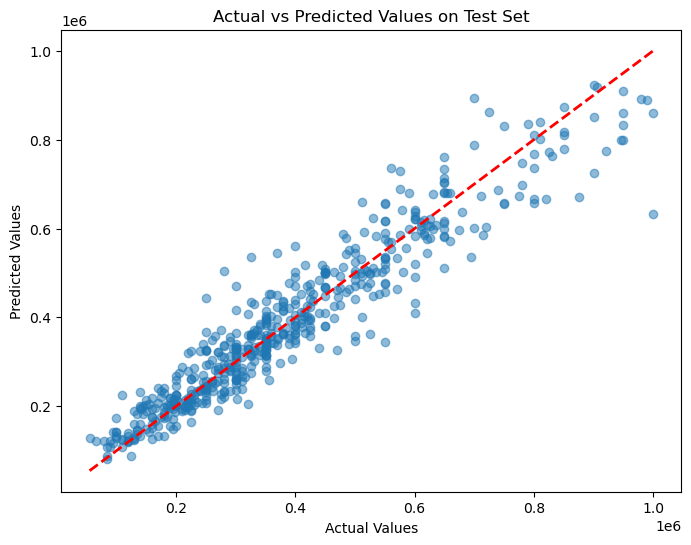

In [34]:

# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
plt.title('Actual vs Predicted Values on Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [35]:

# Residuals
residuals = y_test - y_pred
residuals

1841    -8915.000000
1074   -63887.812500
989     12481.734375
182    -19817.046875
1456    78392.500000
            ...     
1031   -20681.187500
1819    10354.500000
133    -31391.515625
2090   -16690.000000
711    -86529.468750
Name: Price, Length: 540, dtype: float64

C:\Users\cease\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



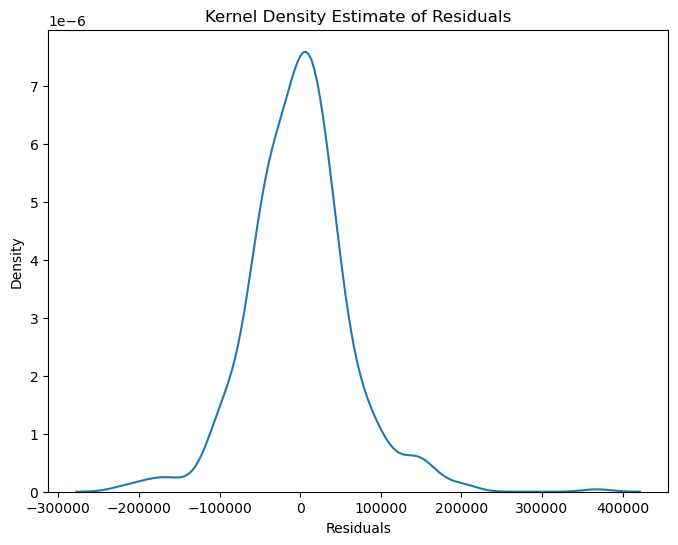

In [36]:

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals)

# Labels
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Kernel Density Estimate of Residuals")

# Show the plot
plt.show()

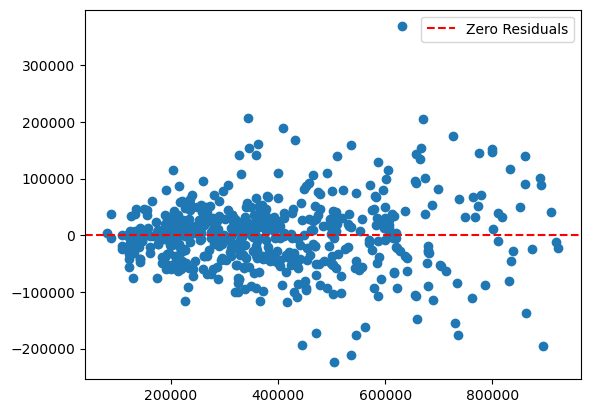

In [37]:

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.legend()

### Making predictions using your model 

In [38]:
X.head()

Name  Year  Distance Driven (km)  Fuel  Seller Type  Transmission  Owner  \
0     5  2014                145500     1            1             1      0   
1     3  2010                127000     1            1             1      0   
2     3  2017                 45000     3            1             1      0   
3     8  2011                 90000     1            1             1      0   
4     1  2013                169000     1            1             1      0   

   Total Seats  Max power (bph)  Mileage  Engine (CC)  
0            5            74.00    23.40         1248  
1            5            90.00    23.00         1396  
2            5            81.86    20.14         1197  
3            5            67.10    23.59         1364  
4            5            68.10    20.00         1399

In [39]:
y.head()

0    450000
1    225000
2    440000
3    350000
4    200000
Name: Price, dtype: int64

In [40]:
X_train.head()

Name  Year  Distance Driven (km)  Fuel  Seller Type  Transmission  Owner  \
593     3  2018                 10000     3            1             1      0   
584     5  2013                 50000     3            1             1      0   
94      1  2010                 90000     1            1             1      2   
794     3  2012                 56000     3            1             1      0   
432     3  2018                 40000     3            1             1      0   

     Total Seats  Max power (bph)  Mileage  Engine (CC)  
593            5            55.20    21.10          814  
584            5            47.30    22.74          796  
94             5            68.00    20.00         1399  
794            5            55.20    21.10          814  
432            5            81.86    20.14         1197

In [41]:
y_train.head()

593    325000
584    200000
94     170000
794    180000
432    480000
Name: Price, dtype: int64

In [42]:
# Preprocess the new data (scaling, encoding categorical variables, etc.)
X_scaled = scaler.transform(X)  # Assuming 'scaler' is the scaler used for scaling the training data

# Take the first row of the preprocessed new data
first_row_X_scaled = X_scaled[0:5]  # Assuming Xn_scaled is a NumPy array

# Make predictions on the first row of the new data
prediction_first_row = best_xgb_model.predict(first_row_X_scaled)

print("Prediction for the first row:", prediction_first_row)


Prediction for the first row: [479138.84 276975.03 508201.88 332426.   240594.  ]


In [43]:
# Preprocess the new data (scaling, encoding categorical variables, etc.)
Xn_scaled = scaler.transform(X_train)  # Assuming 'scaler' is the scaler used for scaling the training data

# Take the first row of the preprocessed new data
first_row_X_scaled = X_scaled[0:5]  # Assuming Xn_scaled is a NumPy array

# Make predictions on the new data
y_pred_new = best_xgb_model.predict(Xn_scaled)

# Print predictions or evaluation metrics
print("Predictions on new data:", y_pred_new)

Predictions on new data: [360254.78 210727.73 196584.66 ... 154099.61 326920.6  471914.22]


## Model Pickling Using Joblib

In [44]:
# from joblib import dump

# # Define the filename for the saved model
# model_filename = 'best_xgb_model.joblib'

# # Save the model to disk
# dump(best_xgb_model, model_filename)

# print("Model saved successfully as", model_filename)


In [45]:
# # Define the filename for the saved scaler
# scaler_filename = 'scaler.joblib'

# # Save the scaler to disk
# dump(scaler, scaler_filename)

# print("Scaler saved successfully as", scaler_filename)


### Making predictions using pickled model 

In [46]:
# from joblib import load

# # Load the saved model from disk
# loaded_model = load("best_xgb_model.joblib")

# # Load the saved scaler from disk
# loaded_scaler = load("scaler.joblib")

# # Transform the new data Xn using the loaded scaler
# Xn_scaled = loaded_scaler.transform(X)

# # Make predictions on the scaled new data Xn
# predictions = loaded_model.predict(Xn_scaled)

# # Print the predictions
# print("Predictions on new data Xn:", predictions)



In [47]:
print(df.columns)

Index(['Name', 'Year', 'Price', 'Distance Driven (km)', 'Fuel', 'Seller Type',
       'Transmission', 'Owner', 'Total Seats', 'Max power (bph)', 'Mileage',
       'Engine (CC)'],
      dtype='object')


### Model pickling with pickle 

In [48]:
import pickle

# Serialize the trained model
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)




In [49]:
# Serialize the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [50]:
X.head()

Name  Year  Distance Driven (km)  Fuel  Seller Type  Transmission  Owner  \
0     5  2014                145500     1            1             1      0   
1     3  2010                127000     1            1             1      0   
2     3  2017                 45000     3            1             1      0   
3     8  2011                 90000     1            1             1      0   
4     1  2013                169000     1            1             1      0   

   Total Seats  Max power (bph)  Mileage  Engine (CC)  
0            5            74.00    23.40         1248  
1            5            90.00    23.00         1396  
2            5            81.86    20.14         1197  
3            5            67.10    23.59         1364  
4            5            68.10    20.00         1399

In [51]:
y.head()

0    450000
1    225000
2    440000
3    350000
4    200000
Name: Price, dtype: int64

In [52]:
# Preprocess the new data (scaling, encoding categorical variables, etc.)
X_scaled = scaler.transform(X)  # Assuming 'scaler' is the scaler used for scaling the training data

# Take the first row of the preprocessed new data
first_row_X_scaled = X_scaled[0:5]  # Assuming Xn_scaled is a NumPy array

# Make predictions on the first row of the new data
prediction_first_row = best_xgb_model.predict(first_row_X_scaled)

print("Prediction for the first row:", prediction_first_row)

Prediction for the first row: [479138.84 276975.03 508201.88 332426.   240594.  ]


In [53]:
import pickle

# Load the pickled scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Transform the new data using the loaded scaler
X_scaled = loaded_scaler.transform(X)

# Load the pickled model
with open('best_xgb_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now, you can use the loaded model to make predictions on the scaled new data
predictions = loaded_model.predict(X_scaled)

# Print the predictions
print("Predictions on new data X:", predictions)



Predictions on new data X: [479138.84 276975.03 508201.88 ... 168846.62 380557.94 484862.56]


In [54]:
import sklearn
print('Scikit-learn version:', sklearn.__version__)

import scipy
print('SciPy version:', scipy.__version__)

import numpy
print('NumPy version:', numpy.__version__)

Scikit-learn version: 1.3.0
SciPy version: 1.11.4
NumPy version: 1.24.3


In [55]:
# app.run(debug=True, use_reloader=False)